In [2]:
import numpy as np
import pandas as pd
from numpy import random

# 데이터 
d1 = pd.date_range('20220701', periods = 100)

df3 = pd.DataFrame(np.random.randn(100, 4), index = d1, columns = list('ABCD'))

df3.head()

,A,B,C,D
2022-07-01,0.234569,-0.797600,1.530627,0.356034
2022-07-02,3.434657,0.271799,0.119547,-1.287648
2022-07-03,2.294178,1.307105,-1.690562,0.290381
2022-07-04,1.461709,-0.424036,0.152466,1.936395
2022-07-05,-0.563664,-0.528465,0.460999,0.548676


In [3]:
# Operation - Apply

# 데이터에 기능을 적용
df3.apply(np.cumsum)

df3.apply(np.cumsum, axis = 1)

,A,B,C,D
2022-07-01,0.234569,-0.563031,0.967596,1.323631
2022-07-02,3.434657,3.706456,3.826003,2.538355
2022-07-03,2.294178,3.601283,1.910721,2.201102
2022-07-04,1.461709,1.037672,1.190138,3.126533
2022-07-05,-0.563664,-1.092129,-0.631130,-0.082455
...,...,...,...,...
2022-10-04,0.406974,-0.093588,0.616798,0.853611
2022-10-05,-1.348833,-2.909784,-3.915199,-5.831192
2022-10-06,-1.343307,-1.332382,-0.854558,-0.223814
2022-10-07,0.400187,0.622995,0.058951,-1.456967


In [4]:
# Operation - Histogramming

s = pd.Series(np.random.randint(0, 7, size = 10))
s

s.value_counts()

3    2
2    2
1    2
5    1
6    1
0    1
4    1
dtype: int64

In [5]:
# Operation - String Methods 1

# Series는 배열의 각 요소를 쉽게 조작할 수 있도록 하는 문자열 처리 메소드 세트를 갖추고 있음
# 주로 문자열에서의 패턴 매칭은 자동으로 정규식을 사용

s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [6]:
# Operation - String Methods 2
dates = pd.date_range('20220701', periods = 6)
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

l = list(range(1001, 1101))
s1 = pd.Series(l, index = pd.date_range('20220701', periods = 100))

df['F'] = s1
df

,A,B,C,D,F
2022-07-01,-0.119792,0.598804,1.186032,-0.918084,1001
2022-07-02,-0.676570,0.703404,-1.512243,-0.898325,1002
2022-07-03,0.103400,0.574240,-1.687541,1.035058,1003
2022-07-04,1.030233,0.880948,1.070085,1.026678,1004
2022-07-05,0.015242,1.676624,-1.049962,0.544272,1005
2022-07-06,-0.155489,-0.813848,-0.746278,-0.694998,1006


In [7]:
# Merge - Concat

# 객체를 연결

df = pd.DataFrame(np.random.randn(10, 4))
df

df[:3]

df[3:7]

df[7:]

pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.874094,0.116517,-0.535968,-0.783044
1,-0.602817,-0.770953,1.887505,0.824068
2,0.809991,0.181690,0.715622,0.951327
3,0.608412,-0.555782,-0.743112,0.169991
4,2.573506,2.069120,-0.106274,-0.290389
5,0.933570,-0.388848,-0.185385,0.993916
6,0.016904,-0.333031,-0.691057,-0.681009
7,0.356774,0.131146,-0.981001,0.758605
8,0.048907,-0.483265,1.117685,-1.419132
9,1.639576,0.652889,-0.412031,1.163266


In [8]:
# Merge - Join

# SQL 방식으로 merge

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
print(left)
print()

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(right)
print()

pd.merge(left, right, on = 'key')

   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5



,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [9]:
# Append

# 데이터 프레임에 하나, 혹은 여러 개의 행을 추가

df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
print(df)
print()

s = df.iloc[3]
df.append(s, ignore_index = True)

          A         B         C         D
0  0.062327  0.188243 -1.323994  0.126718
1  0.394920  1.200867  0.060071 -0.875645
2  0.245207  0.242166 -0.488589 -0.802430
3 -0.756858  0.690309  0.500631  0.900328
4  0.106399 -1.320433  0.854595  0.201342
5 -0.096743 -0.864312  1.470670  0.826832
6 -0.208055 -1.154563 -0.919374  0.698446
7  0.050699  2.098342  0.262891  1.880716



,A,B,C,D
0,0.062327,0.188243,-1.323994,0.126718
1,0.394920,1.200867,0.060071,-0.875645
2,0.245207,0.242166,-0.488589,-0.802430
3,-0.756858,0.690309,0.500631,0.900328
4,0.106399,-1.320433,0.854595,0.201342
5,-0.096743,-0.864312,1.470670,0.826832
6,-0.208055,-1.154563,-0.919374,0.698446
7,0.050699,2.098342,0.262891,1.880716
8,-0.756858,0.690309,0.500631,0.900328


In [10]:
# Grouping

# 그룹화는 다음 단계 중 하나 이상을 포함하는 프로세스를 나타냄
#   어떤 기준에 따라 여러 그룹으로 데이터 분할 (splitting)
#   각 그룹에 독립적으로 함수 적용
#   결과물들을 하나의 자료구조로 결합

df = pd.DataFrame({
  'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
  'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
  'C': np.random.randn(8),
  'D': np.random.randn(8)
})

print(df)
print()

print(df.groupby('A').sum())
print()

df.groupby(['A', 'B']).sum()

     A      B         C         D
0  foo    one  0.411105  0.700375
1  bar    one -0.605564 -0.747462
2  foo    two -0.781745 -1.043510
3  bar  three -0.297104 -1.416228
4  foo    two  1.339764  0.298046
5  bar    two  1.235340 -1.185802
6  foo    one -1.531662  1.081757
7  foo  three -0.287661  1.333292

            C         D
A                      
bar  0.332673 -3.349492
foo -0.850199  2.369961



C         D
A   B                        
bar one   -0.605564 -0.747462
    three -0.297104 -1.416228
    two    1.235340 -1.185802
foo one   -1.120557  1.782133
    three -0.287661  1.333292
    two    0.558019 -0.745464

In [11]:
# Reshaping - Stack

t = list(zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']]))

print(t)
print()

index = pd.MultiIndex.from_tuples(t, names = ['first', 'second'])
print(index)
print()

df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])
print(df)
print()

df2 = df[:4]
df2

# bis S. 43

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

                     A         B
first second                    
bar   one    -0.984430 -0.807722
      two     0.139348  0.999733
baz   one     0.880703  0.435096
      two     0.509160  0.042512
foo   one    -0.119070  0.963768
      two    -0.209261  0.262639
qux   one     0.598363 -0.378103
      two    -0.269917 -0.266782



A         B
first second                    
bar   one    -0.984430 -0.807722
      two     0.139348  0.999733
baz   one     0.880703  0.435096
      two     0.509160  0.042512

In [12]:
# Stack() 메서드는 DataFrame 열들의 레벨을 압축

stacked = df2.stack()
print(stacked)
print()

stacked.unstack()
stacked.unstack(1)
stacked.unstack(0)

first  second   
bar    one     A   -0.984430
               B   -0.807722
       two     A    0.139348
               B    0.999733
baz    one     A    0.880703
               B    0.435096
       two     A    0.509160
               B    0.042512
dtype: float64



first          bar       baz
second                      
one    A -0.984430  0.880703
       B -0.807722  0.435096
two    A  0.139348  0.509160
       B  0.999733  0.042512

In [13]:
# Reshaping - Categoricals

# 데이터프레임 내에 범주형 데이터를 포함할 수 있음

df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})
print(df)
print()
      
df['grade'] = df['raw_grade'].astype('category')
df

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e



,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [14]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']
print(df)
print()

df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df

   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad



,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [17]:
df.sort_values(by = 'grade')

df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

2022-01-01   -0.518543
2022-01-02   -0.808096
2022-01-03   -0.875012
2022-01-04   -0.232434
2022-01-05   -0.287026
                ...   
2024-09-22    1.003457
2024-09-23   -0.458345
2024-09-24   -2.811239
2024-09-25   -1.621942
2024-09-26    0.698543
Freq: D, Length: 1000, dtype: float64

2022-01-01   -0.518543
2022-01-02   -1.326638
2022-01-03   -2.201650
2022-01-04   -2.434084
2022-01-05   -2.721110
                ...   
2024-09-22   -3.785344
2024-09-23   -4.243689
2024-09-24   -7.054928
2024-09-25   -8.676871
2024-09-26   -7.978328
Freq: D, Length: 1000, dtype: float64



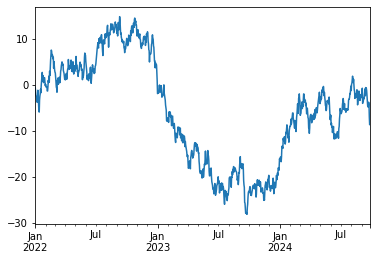

In [22]:
# Plotting
# 판다스 내부에서도 matplotlib 사용

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2022', periods = 1000))
print(ts)
print()

ts = ts.cumsum()
print(ts)
print()

ts.plot()

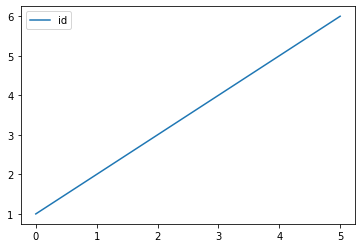

In [25]:
df.plot()